# Classification of the MNIST Data Set with an MLP

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

### Load the Data

In [2]:
d = pd.read_csv('../data/MNIST.csv')

train = d[:60000].copy()
train_label = train.target.copy()
del train['target']

test = d[60000:].copy()
test_label = test.target.copy()
del test['target']

del d

### Classification with a Simple MLP

In [3]:
train_size = 10000
n_retrain = 10

hidden_layers = (200, 200)
activation = 'tanh'
max_iter = 300

best_pred = None
best_score = None

for i in range(n_retrain):
    m = sklearn.neural_network.MLPClassifier(
            hidden_layer_sizes=hidden_layers,
            activation='tanh',
            max_iter=max_iter,
            early_stopping=True,
            random_state=i)
    m.fit(train[:train_size], train_label[:train_size])
    
    pred = m.predict_proba(test)
    
    score = sklearn.metrics.log_loss(test_label, pred)
    
    if (best_score is None) or (score > best_score):
            best_pred = pred
            best_score = score
            
p = pd.DataFrame({
        'pred': pd.DataFrame(best_pred).idxmax(axis=1),
        'true': test_label.tolist()})
print((1.0 * len(p[p.pred == p.true]) / len(p)))
p.sample(10)

0.8786


,pred,true
9927,9,9
3245,5,8
2303,1,1
7707,0,0
8820,8,8
6206,5,5
6895,1,1
5924,0,0
6423,8,3
4195,4,4


### Plotting Classification Performance as a Function of Different Parameters

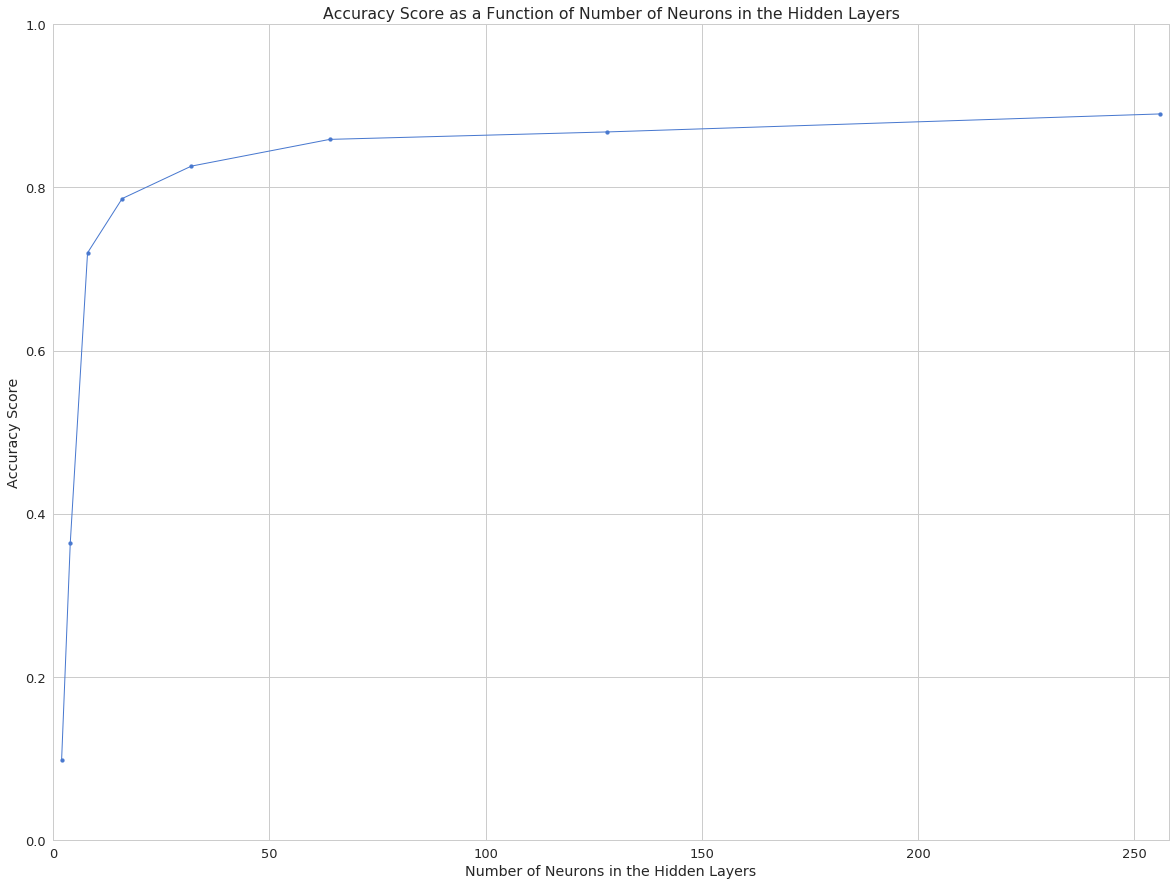

In [4]:
n_neurons = [
    2,
    4,
    8,
    16,
    32,
    64,
    128,
    256
]

accuracy_scores = []

for i in range(len(n_neurons)):

    train_size = 10000
    n_retrain = 10

    hidden_layers = (n_neurons[i], n_neurons[i])
    activation = 'tanh'
    max_iter = 300

    best_pred = None
    best_score = None

    for j in range(n_retrain):
        m = sklearn.neural_network.MLPClassifier(
                hidden_layer_sizes=hidden_layers,
                activation='tanh',
                max_iter=max_iter,
                early_stopping=True,
                random_state=j)
        m.fit(train[:train_size], train_label[:train_size])

        pred = m.predict_proba(test)

        score = sklearn.metrics.log_loss(test_label, pred)

        if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score

    p = pd.DataFrame({
            'pred': pd.DataFrame(best_pred).idxmax(axis=1),
            'true': test_label.tolist()})
    
    accuracy_scores.append((1.0 * len(p[p.pred == p.true]) / len(p)))
    
param_name = 'Number of Neurons in the Hidden Layers'
_ = plt.figure(figsize=fsize)
_ = plt.plot(n_neurons, accuracy_scores, linewidth=linewidth)
_ = plt.scatter(n_neurons, accuracy_scores, marker='o', s=dotsize)
_ = plt.xlim((0, n_neurons[-1] + 2))
_ = plt.ylim((0, 1.0))
_ = plt.xlabel(param_name)
_ = plt.ylabel('Accuracy Score')
_ = plt.title('Accuracy Score as a Function of ' + param_name)

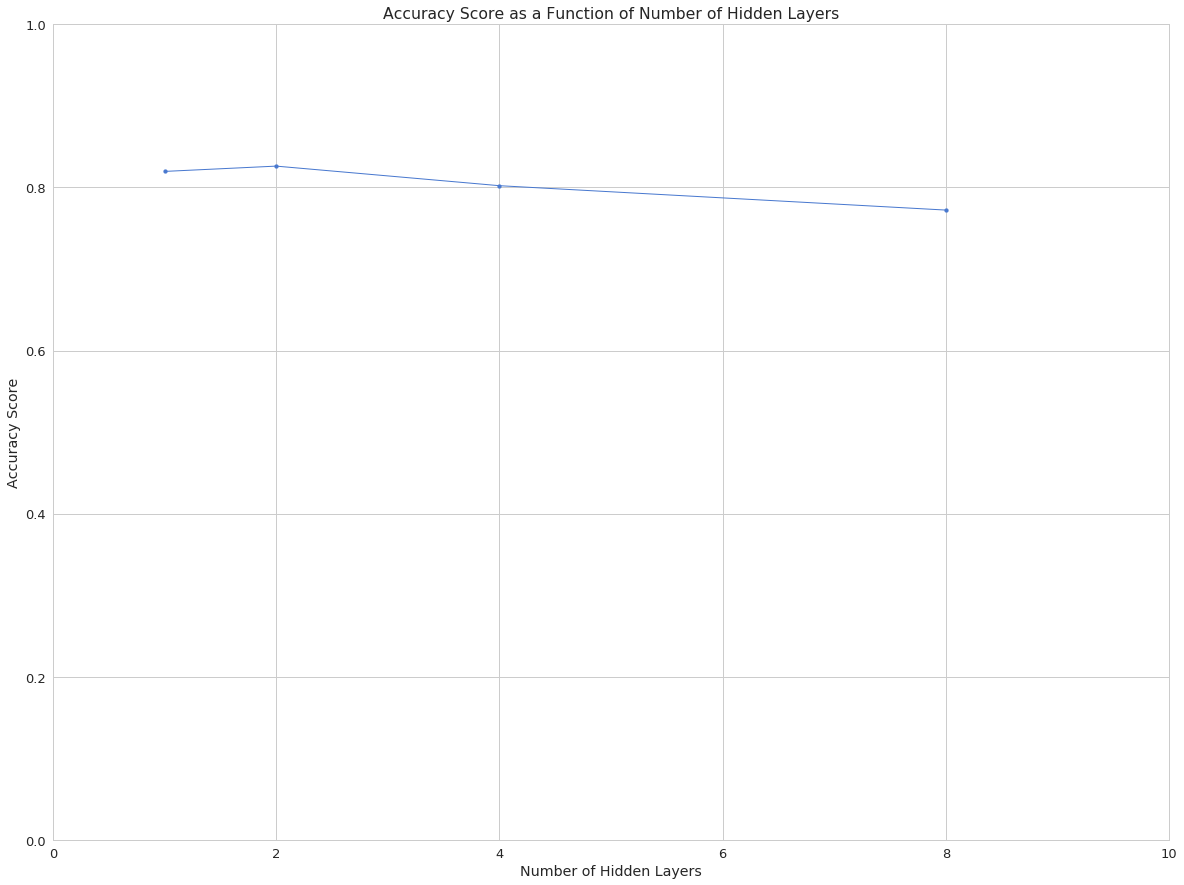

In [5]:
n_layers = [
    1,
    2,
    4,
    8
]

accuracy_scores = []

for i in range(len(n_layers)):

    train_size = 10000
    n_retrain = 10

    hidden_layers = (32,) * n_layers[i]
    activation = 'tanh'
    max_iter = 300

    best_pred = None
    best_score = None

    for j in range(n_retrain):
        m = sklearn.neural_network.MLPClassifier(
                hidden_layer_sizes=hidden_layers,
                activation='tanh',
                max_iter=max_iter,
                early_stopping=True,
                random_state=j)
        m.fit(train[:train_size], train_label[:train_size])

        pred = m.predict_proba(test)

        score = sklearn.metrics.log_loss(test_label, pred)

        if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score

    p = pd.DataFrame({
            'pred': pd.DataFrame(best_pred).idxmax(axis=1),
            'true': test_label.tolist()})
    
    accuracy_scores.append((1.0 * len(p[p.pred == p.true]) / len(p)))
    
param_name = 'Number of Hidden Layers'
_ = plt.figure(figsize=fsize)
_ = plt.plot(n_layers, accuracy_scores, linewidth=linewidth)
_ = plt.scatter(n_layers, accuracy_scores, marker='o', s=dotsize)
_ = plt.xlim((0, n_layers[-1] + 2))
_ = plt.ylim((0, 1.0))
_ = plt.xlabel(param_name)
_ = plt.ylabel('Accuracy Score')
_ = plt.title('Accuracy Score as a Function of ' + param_name)

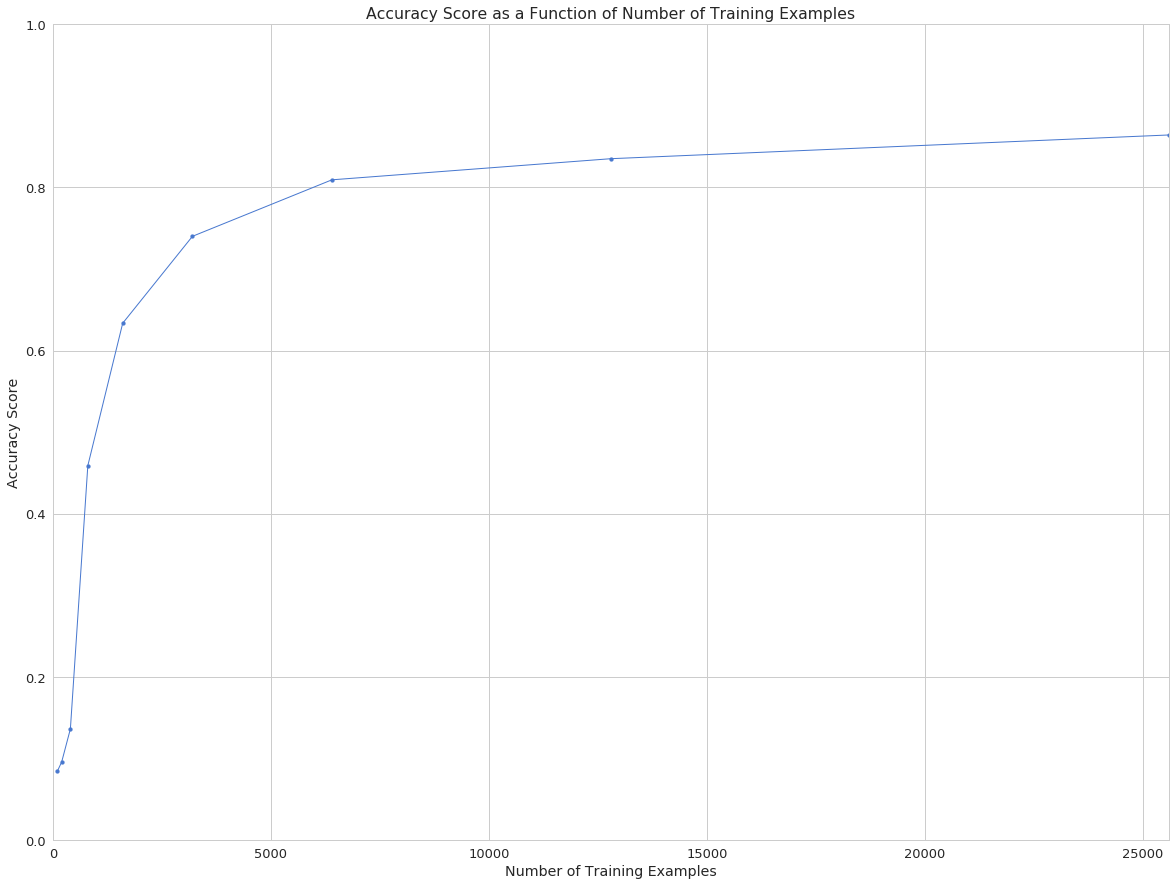

In [6]:
n_samples = [
    100,
    200,
    400,
    800,
    1600,
    3200,
    6400,
    12800,
    25600
]

accuracy_scores = []

for i in range(len(n_samples)):

    train_size = n_samples[i]
    n_retrain = 10

    hidden_layers = (32,) * 2
    activation = 'tanh'
    max_iter = 300

    best_pred = None
    best_score = None

    for j in range(n_retrain):
        m = sklearn.neural_network.MLPClassifier(
                hidden_layer_sizes=hidden_layers,
                activation='tanh',
                max_iter=max_iter,
                early_stopping=True,
                random_state=j)
        m.fit(train[:train_size], train_label[:train_size])

        pred = m.predict_proba(test)

        score = sklearn.metrics.log_loss(test_label, pred)

        if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score

    p = pd.DataFrame({
            'pred': pd.DataFrame(best_pred).idxmax(axis=1),
            'true': test_label.tolist()})
    
    accuracy_scores.append((1.0 * len(p[p.pred == p.true]) / len(p)))
    
param_name = 'Number of Training Examples'
_ = plt.figure(figsize=fsize)
_ = plt.plot(n_samples, accuracy_scores, linewidth=linewidth)
_ = plt.scatter(n_samples, accuracy_scores, marker='o', s=dotsize)
_ = plt.xlim((0, n_samples[-1] + 2))
_ = plt.ylim((0, 1.0))
_ = plt.xlabel(param_name)
_ = plt.ylabel('Accuracy Score')
_ = plt.title('Accuracy Score as a Function of ' + param_name)

/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


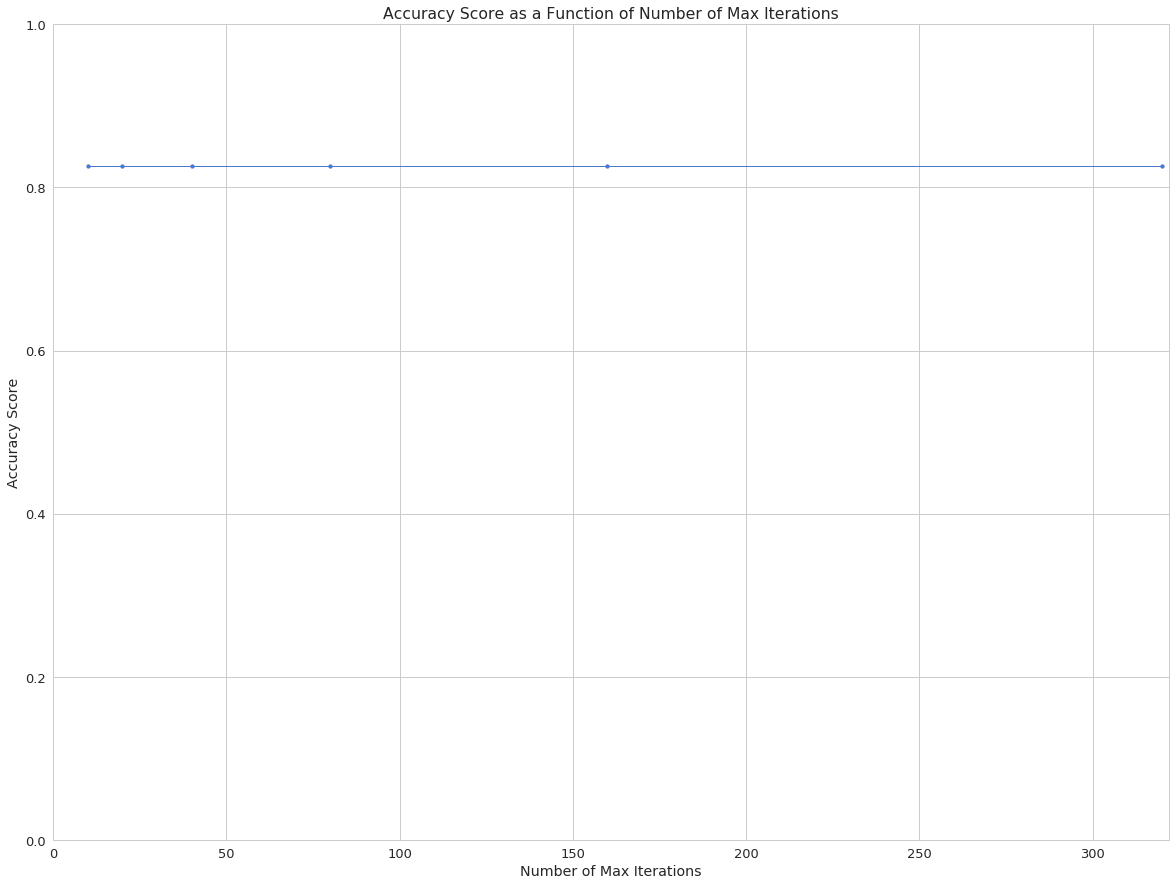

In [7]:
max_iters = [
    10,
    20,
    40,
    80,
    160,
    320
]

accuracy_scores = []

for i in range(len(max_iters)):

    train_size = 10000
    n_retrain = 10

    hidden_layers = (32,) * 2
    activation = 'tanh'
    max_iter = max_iters[i]

    best_pred = None
    best_score = None

    for j in range(n_retrain):
        m = sklearn.neural_network.MLPClassifier(
                hidden_layer_sizes=hidden_layers,
                activation='tanh',
                max_iter=max_iter,
                early_stopping=True,
                random_state=j)
        m.fit(train[:train_size], train_label[:train_size])

        pred = m.predict_proba(test)

        score = sklearn.metrics.log_loss(test_label, pred)

        if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score

    p = pd.DataFrame({
            'pred': pd.DataFrame(best_pred).idxmax(axis=1),
            'true': test_label.tolist()})
    
    accuracy_scores.append((1.0 * len(p[p.pred == p.true]) / len(p)))
    
param_name = 'Number of Max Iterations'
_ = plt.figure(figsize=fsize)
_ = plt.plot(max_iters, accuracy_scores, linewidth=linewidth)
_ = plt.scatter(max_iters, accuracy_scores, marker='o', s=dotsize)
_ = plt.xlim((0, max_iters[-1] + 2))
_ = plt.ylim((0, 1.0))
_ = plt.xlabel(param_name)
_ = plt.ylabel('Accuracy Score')
_ = plt.title('Accuracy Score as a Function of ' + param_name)